# Analysis and Visualisation: NBA Trends

In this project, we’ll analyse and visualise data from  NBA (National Basketball Association) and explore possible associations.

Note: this dataset has been already preprocessed. To  make things more transparent and brief, there are only 5 teams included: **"Knicks"**, **"Celtics"**, **"Thunder"**, **"Spurs"**, **"Nets"**.

Columns description: 

- `game_id`: an identification number of a game;
- `year_id`: a year the game played;
- `fran_id`: a host's franchise identification name; 
- `opp_fran`: an opponent's franchise identification name;
- `game_location`: a code to mark game locations (`H` - home, `A` - away);
- `is_playoffs`: a code to mark whether the game is a playoff - a final game or a series of games played to break a tie (`1` - playoff, `0` - not a playoff);
- `pts`: host's points;
- `opp_pts`: opponent's points;
- `game_result`: a code to mark result of a game for a host (`W` - won, `L` - lost);
- `forecast`: chances for winning (closer to 0 - losing, closer to 1 - winning);
- `point_diff`: a difference in points between a host and an opponent.

### Analysing relationships between Quantitative and Categorical

First, let's import necessary libraries and upload `nba_games.csv` to `nba` variable. 


In [24]:
import numpy as np
import pandas as pd
from scipy.stats import pearsonr, chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns


nba = pd.read_csv('nba_games.csv')

Let's start with smaller slice of the dataset: games of the year 2010.

In [25]:
# Subset Data of 2010 
nba_2010 = nba[nba.year_id == 2010]
nba_2010.head(10)

,game_id,year_id,fran_id,opp_fran,game_location,is_playoffs,pts,opp_pts,game_result,forecast,point_diff
21717,200910270CLE,2010,Celtics,Cavaliers,A,0,95,89,W,0.277472,6
21718,200910280BOS,2010,Celtics,Hornets,H,0,92,59,W,0.814619,33
21719,200910280MIA,2010,Knicks,Heat,A,0,93,115,L,0.258755,-22
21720,200910280MIN,2010,Nets,Timberwolves,A,0,93,95,L,0.475155,-2
21721,200910280OKC,2010,Thunder,Kings,H,0,102,89,W,0.716764,13
21722,200910280SAS,2010,Spurs,Pelicans,H,0,113,96,W,0.747176,17
21723,200910290CHI,2010,Spurs,Bulls,A,0,85,92,L,0.440765,-7
21724,200910300BOS,2010,Celtics,Bulls,H,0,118,90,W,0.768774,28
21725,200910300CHA,2010,Knicks,Hornets,A,0,100,102,L,0.299804,-2
21726,200910300DET,2010,Thunder,Pistons,A,0,91,83,W,0.255529,8


Suppose we want to compare average number of points per game for **"Knicks"** and **"Nets"** in 2010.

In [26]:
# Knicks points in 2010
knicks_pts = nba_2010.pts[nba_2010.fran_id == 'Knicks']
knicks_pts

21719     93
21725    100
21728    127
21734    117
21739     89
        ... 
22102    105
22110    103
22116     98
22118    114
22126    113
Name: pts, Length: 82, dtype: int64

In [27]:
# Nets points in 2010
nets_pts = nba_2010.pts[nba_2010.fran_id == 'Nets']
nets_pts

21720     93
21727     85
21730    104
21733     68
21738     94
        ... 
22103     89
22108    127
22113    102
22117     95
22124     86
Name: pts, Length: 82, dtype: int64

Let's check difference between their means.

In [28]:
# Difference between Knicks and Nets averages
diff_means_2010 = knicks_pts.mean() - nets_pts.mean()
diff_means_2010

9.731707317073173

Result: **"Knicks"** have almost 10 points more on average than **"Nets"**.

Now we are going to visualise points of **"Knicks"** and **"Nets"** in 2010 as overlapping histograms to see distribution of their points compared to each other. 

In [29]:
# Filter slice of a year 2010 so it contains only 2 teams
knicks_nets_2010 = nba_2010[(nba_2010.fran_id == 'Knicks') | (nba_2010.fran_id == 'Nets')]

In [30]:
# Create overlapping histplot function
def visualise_histplotoverlap(dataset, palette, title, xlabel, ylabel, legend_labels, legend_title):
    # Prepare grid
    plt.figure(figsize = (15,10))

    # Plot a histogram
    ax = sns.histplot(
        dataset, 
        x=dataset.pts, 
        hue=dataset.fran_id, 
        stat="count", 
        legend=True, 
        palette= palette)

    # Add descriptions
    ax.legend(title=legend_title, 
    title_fontsize='large', 
    loc='best', 
    labels=legend_labels, 
    fontsize = 'large')

    ax.set_title(title, fontsize = 'x-large')
    ax.set_xlabel(xlabel, fontsize = 'large')
    ax.set_ylabel(ylabel, fontsize = 'large')

    return plt.show()

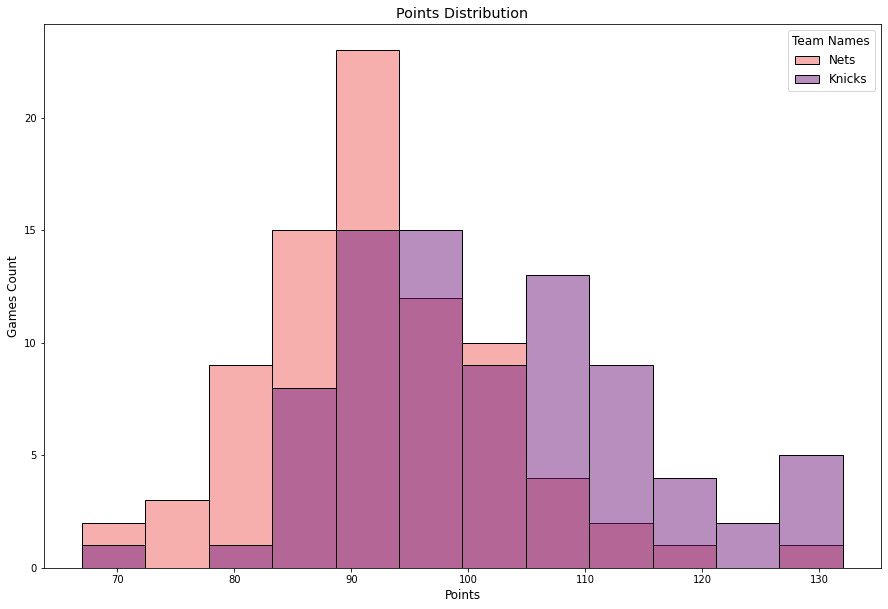

In [31]:
# Call overlapping histplot function
visualise_histplotoverlap(
    knicks_nets_2010, 
    palette= 'magma', 
    title='Points Distribution', 
    xlabel='Points', 
    ylabel='Games Count', 
    legend_labels=['Nets', 'Knicks'], 
    legend_title='Team Names')

Result: **"Knicks"** results are better in general, although **"Nets"** have more than 20 games with about 90 points. 

As a second step we are going to visualise points of **"Knicks"** and **"Nets"** in 2010 as boxplots to see distribution of their points compared to each other with median (black line on the boxes) and mean (black cross on the boxes). 

In [32]:
# Create boxplot function
def visualise_boxplot(dataset, palette, title, xlabel, ylabel):
    plt.figure(figsize = (15,10))
    ax = sns.boxplot(
        x= dataset.fran_id, 
        y= dataset.pts,
        palette=palette, 
        showmeans=True,
        meanprops={"marker": "+",
            "markeredgecolor": "black",
            "markersize": "10"})

    # Add descriptions
    ax.set_title(title, fontsize = 'x-large')
    ax.set_xlabel(xlabel, fontsize = 'large')
    ax.set_ylabel(ylabel, fontsize = 'large')

    return plt.show()

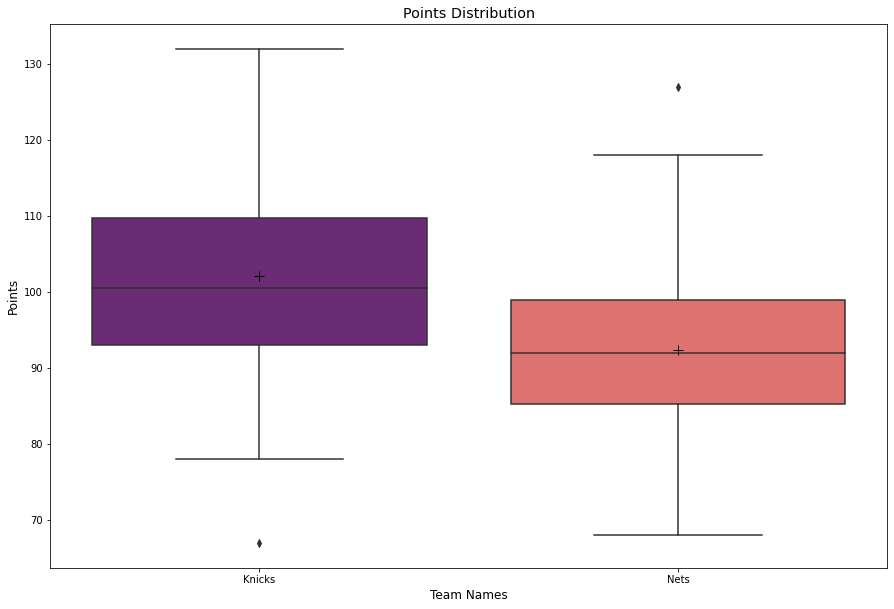

In [33]:
# Call boxplot function
visualise_boxplot(
    knicks_nets_2010, 
    palette='magma', 
    title='Points Distribution', 
    xlabel='Team Names', 
    ylabel='Points')

Result: 
- On a boxplot it is more apparent that **"Knicks"** results in 2010 are better, because significant part of their points (the box itself) is located in the area of higher points `95-110`.
- The spread of general points for **"Knicks"** is observed from `~80` to `~130`, for **"Nets"** - from `~70` to `~120`
- Median and mean are close to each other on both plots.
- Each team has only one outlier, **"Knicks"** around `70` points, **"Nets"** - `~125`.


Now we will visualise points of **"Knicks"** and **"Nets"** via line plot over years.

In [34]:
# Filter slice of over years so it contains only 2 teams
knicks_nets_all_years = nba[(nba.fran_id == 'Knicks') | (nba.fran_id == 'Nets')]

In [35]:
# Create lineplot function
def visualise_lineplot(dataset, palette, title, xlabel, ylabel, legend_title):
    # Prepare grid
    plt.figure(figsize = (15,10))
    # Create lineplot
    ax = sns.lineplot( 
        x=dataset.year_id, 
        y=dataset.pts, 
        hue=dataset.fran_id,  
        palette= palette,
        legend=True)

    # Add descriptions
    ax.legend(title=legend_title, 
    title_fontsize='large', 
    loc='best',
    fontsize = 'large') 

    ax.set_title(title, fontsize = 'x-large')
    ax.set_xlabel(xlabel, fontsize = 'large')
    ax.set_ylabel(ylabel, fontsize = 'large')

    return plt.show()

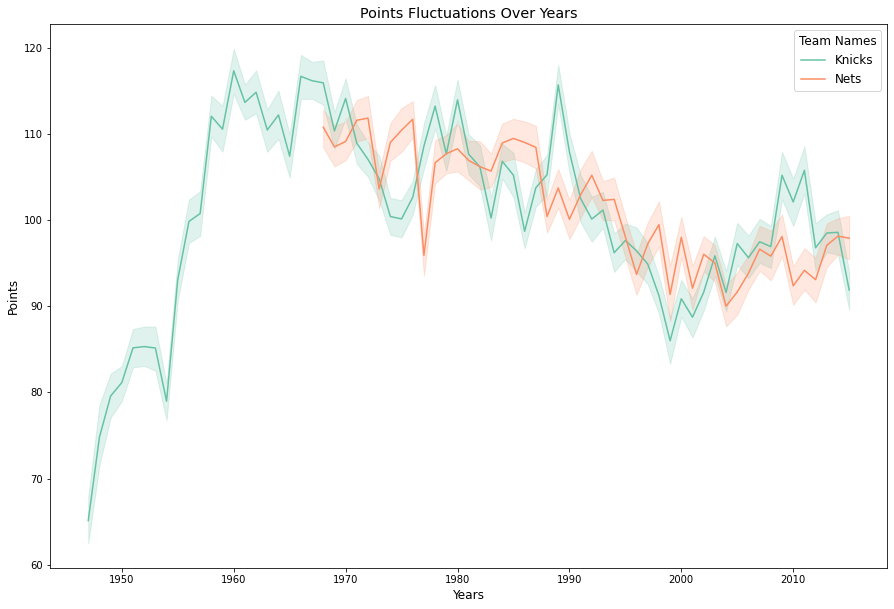

In [36]:
# Call lineplot function
visualise_lineplot(
    knicks_nets_all_years, 
    palette='Set2', 
    title='Points Fluctuations Over Years', 
    xlabel='Years', 
    ylabel='Points',  
    legend_title='Team Names')

Result: 

-  **"Knicks"** data starts about 20 years before **"Nets"**, so we see their progress from around `65`points to significant peak of `120` points. 
- After the peak we see fluctuations of medium magnitude, with some falls to `100-110` points. 
- Most significant fall to the level of `90-95` points was from the middle of the 90s to the middle of the 2000s.
- In 2005-2015 **"Knicks"**  results became a bit better and have  almost reached `100-110` points, but later fall again and it's not clear how bad, because there are no data.
- **"Nets"** have approximately the same fluctuation magnitude from the formation of the team in the late 60s, but their "starting points" are much better - around `110`. Nevertheless they also have similar to **"Knicks"** decline with slightly better fluctuations `90-100` during the middle of the 90s to the middle of the 2000s.
- After 2005 **"Nets"** points continued their fluctuations but on the lower level around `90-100` points.


Let's see what we'll see on the line plot with points of all available teams over years. 

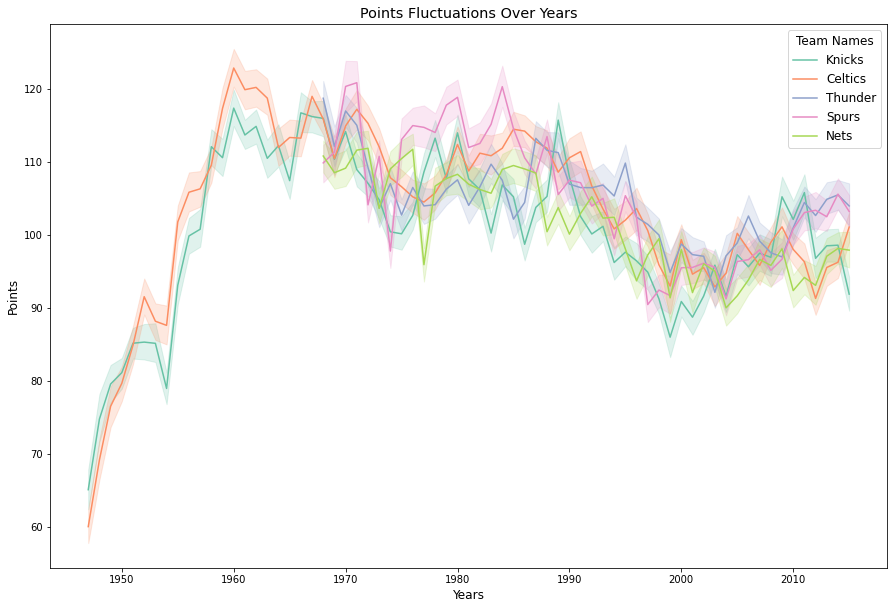

In [37]:
# Call lineplot function
visualise_lineplot(
    nba, 
    palette='Set2', 
    title='Points Fluctuations Over Years', 
    xlabel='Years', 
    ylabel='Points',  
    legend_title='Team Names')


Interesting enough, general pattern of rises and falls is very similar for all 5 teams: 
- all of them had more or less good times from the late 60s to the 90s; - after that everyone got caught up in some crisis from 95 to 2005, which passed in a mild or acute form for each, but one way or another, all were involved;
- from 2005  everyone started slowly but steadily rise again but with many fluctuations: **"Knicks"**, **"Celtics"** and **"Nets"** weren't as good as others, although **"Knicks"** had couple of peaks around 2010. 
- **"Thunder"**, **"Spurs"** are doing much better than others getting around `100-105` points in the 2010s. 

Let's see the same results but now each team on a separate plot. 

In [38]:
def visualise_facetplot(dataset, col, hue, palette, xcolumn, ycolumn, xlabelx, ylabel):
    # Create grid
    g = sns.FacetGrid(
        data=dataset, 
        col=col, 
        col_wrap=3, 
        height=4, 
        aspect=1.5, 
        hue=hue, 
        palette=palette,
        sharex=False, 
        sharey=True)
    
    # Add plots to grid
    g.map(sns.lineplot, xcolumn, ycolumn)

    # Add labels
    g.set_axis_labels(xlabelx, ylabel)

    return plt.show()

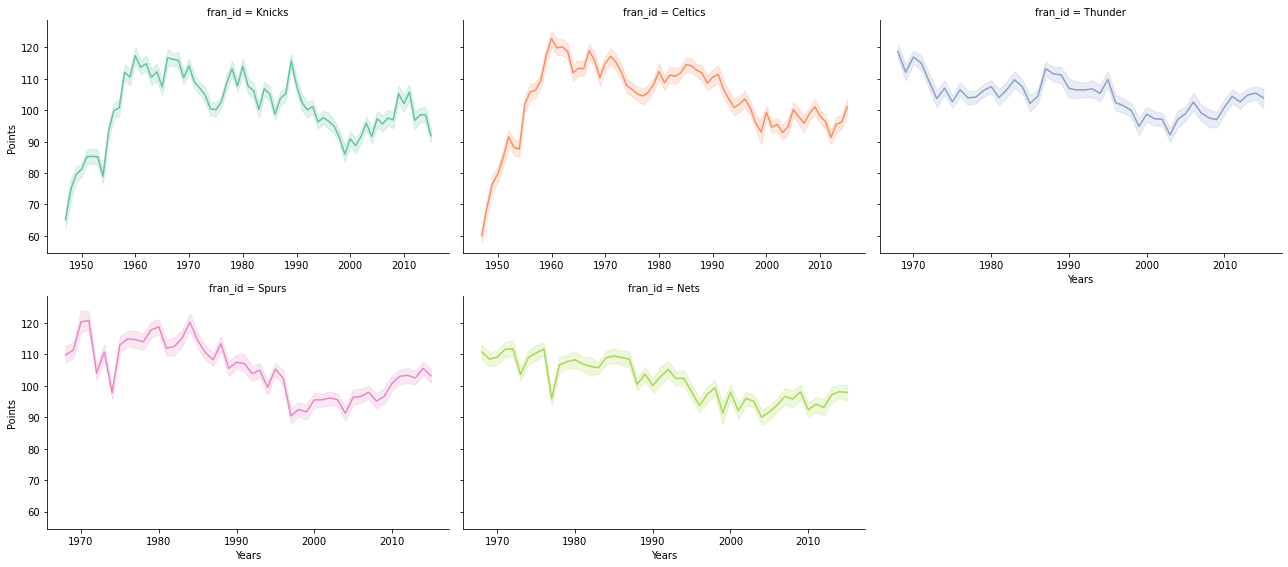

In [39]:
visualise_facetplot(
    nba,  
    col='fran_id',
    hue='fran_id', 
    palette='Set2', 
    xcolumn='year_id', 
    ycolumn='pts', 
    xlabelx="Years", 
    ylabel="Points")

And whose general results over years are better? 

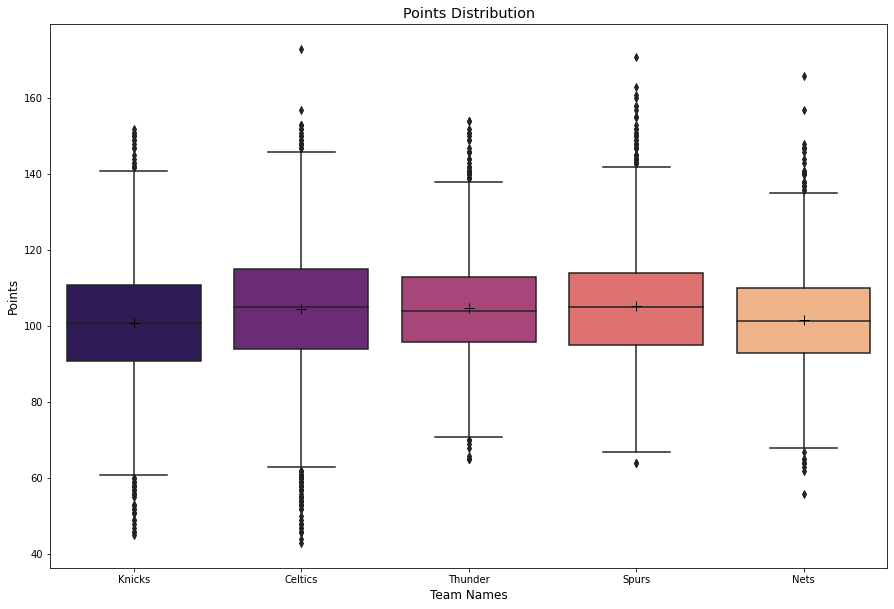

In [40]:
# Call boxplot function
visualise_boxplot(
    nba, 
    palette='magma', 
    title='Points Distribution', 
    xlabel='Team Names', 
    ylabel='Points')

Result: 
- Seems like **"Celtics"** have a bit better general result by points, but **"Spurs"** are very close and have many outliers with high number of ponts, while **"Celtics"** have the maximum number of outliers with the low number of points. 
- **"Thunder"** have the most stable at the same time ruther good level: their box plot and its lines are located most compactly and quite high on the points scale. 
- **"Knicks"** are a bit better than **"Nets"** by the main number of high points (box itself), but has more low points outliers, while 
- **"Nets"** on the contrary have more outliers with high points. Both teams are located lower than other teams on the general points scale. 

**"Knicks"** and **"Celtics"** played much more games than others and started from very low points compared to modern stadtarts, so their results are a scued. Let's try to fix it to get better understanding who is generally better. 